In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets

print('python version:', sys.version.split('\n')[0])
for m in [tf, np, pd, mpl]:
    print(m.__name__, 'version:', m.__version__)

python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
tensorflow version: 2.3.1
numpy version: 1.18.5
pandas version: 1.1.3
matplotlib version: 3.3.2


# concatenation & split

In [5]:
# concatenation

a = tf.random.normal([3,28,28]) # 3 pictures
b = tf.random.normal([2,28,28]) # 2 pictures

tf.concat([a, b], axis=0).shape # 5 pictures

TensorShape([5, 28, 28])

In [7]:
# stack

a = tf.random.normal([28,28]) # a picture
b = tf.random.normal([28,28]) # another picture

tf.stack([a,b], axis=0).shape # 2 pictures

TensorShape([2, 28, 28])

In [20]:
# split

x = tf.random.normal([100,28,28]) # 100 pictires

print(len(tf.split(x, num_or_size_splits=5, axis=0))) # 5 portions of pictures
print(len(tf.split(x, num_or_size_splits=[20,30,50], axis=0))) # 3 portions of pictures with the size of 20, 30 and 50

5
3


In [22]:
# unstack

x = tf.random.normal([100,28,28]) # 100 pictires

print(len(tf.unstack(x, axis=0)))
print(tf.unstack(x, axis=0)[0].shape)

100
(28, 28)


# statistics

In [24]:
# norm 

x = tf.ones([2,2])

print(tf.norm(x, ord=1)) # L1
print(tf.norm(x, ord=2)) # L2
print(tf.norm(x, ord=np.inf)) # max(|x|)

tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [36]:
# min, max, mean, sum ...

x = tf.random.normal([4,10])

# local
print(tf.reduce_max(x, axis=1))
print(tf.reduce_mean(x, axis=1))

# global
print(tf.reduce_min(x))

# the index of ...
print(tf.argmax(x, axis=1)) # defalt axis=0

tf.Tensor([1.6245486 1.2567406 1.8754562 1.0777475], shape=(4,), dtype=float32)
tf.Tensor([ 0.11524653  0.39018917 -0.2849515  -0.29134542], shape=(4,), dtype=float32)
tf.Tensor(-2.0447829, shape=(), dtype=float32)
tf.Tensor([5 6 5 5], shape=(4,), dtype=int64)


# tensor comparison

In [45]:
out = tf.random.normal([100,10])
out = tf.nn.softmax(out, axis=1)
pred = tf.argmax(out, axis=1)
y = tf.random.uniform([100],dtype=tf.int64,maxval=10)
out = tf.equal(pred,y)
out = tf.cast(out, dtype=tf.float32)
correct = tf.reduce_sum(out)
print(correct.numpy())

3.0


# Padding

In [46]:
# paddings = [[L padding, R padding], ...., [L padding, R padding]] ## dim 1, ..., dim n

a = tf.constant([1,2,3,4,5,6])
b = tf.constant([7,8,1,6])

b = tf.pad(b, [[0,2]]) # pad zero 0 from right and two 0s from left in the first dimension

tf.stack([a,b],axis=0)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 2, 3, 4, 5, 6],
       [7, 8, 1, 6, 0, 0]], dtype=int32)>

# data clipped

In [48]:
# tf.maximum(x, a) [0, +inf) -> [a, +inf)
# tf.minimum(x, a) [0, +inf) -> [0, a]

x = tf.range(9) # [0,9)
print(tf.minimum(tf.maximum(x,2),7))
print(tf.clip_by_value(x, 2, 7))

tf.Tensor([2 2 2 3 4 5 6 7 7], shape=(9,), dtype=int32)
tf.Tensor([2 2 2 3 4 5 6 7 7], shape=(9,), dtype=int32)


# advanced operation

In [50]:
# tf.gather: get the data according the index

x = tf.random.normal([100, 28, 28, 3]) # 100 RGB pictures

print(tf.gather(x, [28, 36, 99], axis=0).shape) # get the 29th, 37th, 100th picture

(3, 28, 28, 3)


In [60]:
# tf.gather_nd: sample and stack

x = tf.random.normal([100, 28, 28, 3])
x = tf.transpose(x, perm=[0,3,1,2]) # move the color info to the 2nd dimension

print(tf.stack([x[28,0],x[36,0],x[99,0]],axis=0).shape) # the R chanel of three pictures
print(tf.gather_nd(x, [[28,0],[36,0],[99,0]]).shape)

(3, 28, 28)
(3, 28, 28)


In [62]:
# tf.boolean_mask
x = tf.random.normal([100, 28, 28, 3]) # 100 RGB pictures

print(tf.boolean_mask(x, mask=[True, False, True], axis=3).shape) # get RB chanel

(100, 28, 28, 2)


In [63]:
# tf.where(cond, a, b): a cond b? a:b

a = tf.ones([3,3])
b = tf.zeros([3,3])
cond = tf.constant([[True,False,False],[False,True,False],[False,False,True]])

tf.where(cond,a,b)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [69]:
# get all the positive value and their index in a tensor
x = tf.random.normal([3,3])

indices = tf.where(x>0)
print(indices)

tf.gather_nd(x, indices)

tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [2 1]], shape=(4, 2), dtype=int64)


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1.0917095 , 0.16817929, 1.2301319 , 0.98438597], dtype=float32)>

In [74]:
# tf.scatter_nd: refresh the blank board according to indices

indices = tf.constant([[4], [3], [1], [7]])
updates = tf.constant([4.4, 3.3, 1.1, 7.7])

print(tf.scatter_nd(indices, updates, [8]))

indices = tf.constant([[0], [2]])
updates = tf.constant([[1,1,1], [3,3,3]])

print(tf.scatter_nd(indices, updates, [3,3]))

tf.Tensor([0.  1.1 0.  3.3 4.4 0.  0.  7.7], shape=(8,), dtype=float32)
tf.Tensor(
[[1 1 1]
 [0 0 0]
 [3 3 3]], shape=(3, 3), dtype=int32)


(100, 100) (100, 100)


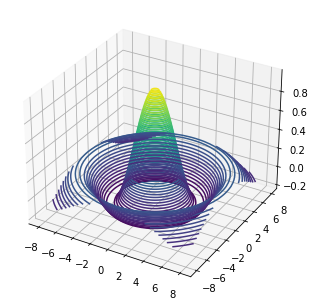

In [77]:
# tf.meshgrid

# ineffecient
# points = [] 
# for x in range(-8,8,100): 
#     for y in range(-8,8,100): 
#         z = sinc(x,y) 
#         points.append([x,y,z])

x = tf.linspace(-8, 8, 100)
y = tf.linspace(-8, 8, 100)
x, y = tf.meshgrid(x, y)
print(x.shape, y.shape)

z = tf.sqrt(x**2+y**2)
z = tf.sin(z)/z

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.contour3D(x.numpy(), y.numpy(), z.numpy(), 50)
plt.show()

# Loading common data

In [104]:
# datasets.xxx.load_data(): CIFAR10, MINST...
(x, y), (x_test, y_test) = datasets.mnist.load_data() # return 2 tuple
print('x:', x.shape, 'y:', y.shape, 'x test:', x_test.shape, 'y test:',
y_test)

train_db = tf.data.Dataset.from_tensor_slices((x, y)) # convert to Dataset object

x: (60000, 28, 28) y: (60000,) x test: (10000, 28, 28) y test: [7 2 1 ... 4 5 6]


In [80]:
# Dataset.shuffle(buffer_size)
train_db = train_db.shuffle(10000)

In [105]:
# batch training
train_db = train_db.batch(128)

In [101]:
# Dataset .map(preprocess)

def preprocess(x,y):
    
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [-1, 28*28])
    
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)
    
    return x,y

train_db = train_db.map(preprocess)

In [106]:
for epoch in range(20): # loop all dataset 20 times
    
    for step, (x,y) in enumerate(train_db): # one step loop one batch
        pass

# train_db = train_db.repeat(20) # equivalent